<a href="https://colab.research.google.com/github/Mio2001/Analyzing-Japanese-Suicidal-Tweets/blob/readme_edit/Istvan_Thesis_Code_(final).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Suicide Rate Visualizations

The necessary libraries for this portion.

In [ ]:
from google.colab import drive
drive.mount('drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

Set path to where you want to save images.

In [ ]:
image_dir = '/content/drive/MyDrive'

Below are lists of the number of suicides by month. The data was obtained from Japan's Ministry of Health, Labour and Welfare's [annual report on suicide statistics](https://www.mhlw.go.jp/stf/seisakunitsuite/bunya/hukushi_kaigo/seikatsuhogo/jisatsu/jisatsu_year.html).

In [ ]:
Month = [1.0, 2 ,3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
#a list of the number of suicides by month
Suicides_2022 = [1716, 1516, 1993, 1812, 2174, 1977, 1867, 1780, 1930, 1772, 1773, 1571]
Suicides_2021 = [1754, 1694, 2008, 1850, 1863, 1850, 1718, 1725, 1643, 1639, 1541, 1545]
Suicides_2020 = [1686, 1464, 1758, 1507, 1591, 1572, 1865, 1931, 1889, 2230, 1893, 1695]
Suicides_2019 = [1684, 1615, 1856, 1814, 1853, 1640, 1793, 1603, 1662, 1539, 1616, 1494]
Suicides_2018 = [1641, 1599, 2005, 1825, 1863, 1740, 1725, 1708, 1728, 1793, 1623, 1590]
Suicides_2017 = [1815, 1646, 1915, 1940, 2024, 1869, 1837, 1852, 1821, 1642, 1565, 1395]
Suicides_2016 = [1851, 1729, 2113, 1880, 2065, 1862, 1862, 1701, 1765, 1820, 1683, 1566]
Suicides_2015 = [2057, 1771, 2301, 2094, 2244, 2018, 2068, 1901, 1882, 2016, 1887, 1786]
Suicides_2014 = [2079, 1878, 2317, 2229, 2262, 2068, 2024, 2188, 2257, 2233, 2096, 1796]
Suicides_2013 = [2453, 2156, 2486, 2383, 2542, 2318, 2293, 2197, 2245, 2164, 2045, 2001]
Suicides_2012 = [2268, 2163, 2588, 2437, 2525, 2313, 2413, 2242, 2314, 2426, 2140, 2029]
Suicides_2011 = [2287, 2151, 2464, 2711, 3375, 3037, 2813, 2612, 2446, 2402, 2256, 2097]
Suicides_2010 = [2536, 2445, 2957, 2585, 2782, 2780, 2873, 2559, 2490, 2446, 2812, 2425]
Suicides_2009 = [2667, 2490, 3103, 3066, 3003, 2857, 2783, 2525, 2530, 2811, 2522, 2488]
Suicides_2008 = [2542, 2408, 2939, 2854, 2796, 2769, 2652, 2431, 2714, 3092, 2539, 2513]

In [ ]:
data = {
    2022: [1716, 1516, 1993, 1812, 2174, 1977, 1867, 1780, 1930, 1772, 1773, 1571],
    2021: [1754, 1694, 2008, 1850, 1863, 1850, 1718, 1725, 1643, 1639, 1541, 1545],
    2020: [1686, 1464, 1758, 1507, 1591, 1572, 1865, 1931, 1889, 2230, 1893, 1695],
    2019: [1684, 1615, 1856, 1814, 1853, 1640, 1793, 1603, 1662, 1539, 1616, 1494],
    2018: [1641, 1599, 2005, 1825, 1863, 1740, 1725, 1708, 1728, 1793, 1623, 1590],
    2017: [1815, 1646, 1915, 1940, 2024, 1869, 1837, 1852, 1821, 1642, 1565, 1395],
    2016: [1851, 1729, 2113, 1880, 2065, 1862, 1862, 1701, 1765, 1820, 1683, 1566],
    2015: [2057, 1771, 2301, 2094, 2244, 2018, 2068, 1901, 1882, 2016, 1887, 1786],
    2014: [2079, 1878, 2317, 2229, 2262, 2068, 2024, 2188, 2257, 2233, 2096, 1796],
    2013: [2453, 2156, 2486, 2383, 2542, 2318, 2293, 2197, 2245, 2164, 2045, 2001],
    2012: [2268, 2163, 2588, 2437, 2525, 2313, 2413, 2242, 2314, 2426, 2140, 2029],
    2011: [2287, 2151, 2464, 2711, 3375, 3037, 2813, 2612, 2446, 2402, 2256, 2097],
    2010: [2536, 2445, 2957, 2585, 2782, 2780, 2873, 2559, 2490, 2446, 2812, 2425],
    2009: [2667, 2490, 3103, 3066, 3003, 2857, 2783, 2525, 2530, 2811, 2522, 2488],
    2008: [2542, 2408, 2939, 2854, 2796, 2769, 2652, 2431, 2714, 3092, 2539, 2513]
}

Calculate the average number of suicides for each month.

In [ ]:
averages = [sum(data[year][i] for year in data) / len(data) for i in range(12)]
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

Basic exploratory data analysis and visualizations.



In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(months, averages, marker = 'o')
plt.title('Monthly Average Suicides (2008-2022)', fontsize=14)

for i, avg in enumerate(averages):
    plt.text(months[i], avg, f"{avg:.1f}", ha='left', va='bottom')

plt.xlabel('Month', fontsize=14)
plt.ylabel('Suicides', fontsize=14)
plt.grid(True)
plt.tight_layout()

plt.savefig(image_dir + 'Monthly Average Suicides (2008-2022)', dpi=600)

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(Month, Suicides_2022, color='red', marker='o')
plt.title('Suicides by Month (2022)', fontsize=14)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Suicides', fontsize=14)
plt.ylim([1400, 2200])
plt.xticks(np.arange(min(Month), max(Month)+1, 1.0))
plt.grid(True)

plt.tight_layout()
plt.savefig(image_dir + 'Suicides by Month (2022)', dpi=600)

In [ ]:
plt.figure(figsize=(15, 6))
line3, = plt.plot(Month, Suicides_2022, color = 'green', marker = 'o', label = '2022')
line2, = plt.plot(Month, Suicides_2021, color = 'red', marker = 'o', label = '2021')
line1, = plt.plot(Month, Suicides_2020, marker = 'o', label = '2020')
plt.title('Suicides by Month (2020-2022)', fontsize=14)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Suicides', fontsize=14)
plt.legend(handles=[line1, line2, line3])
plt.xticks(np.arange(min(Month), max(Month)+1, 1.0))
plt.grid(True)
plt.show()

plt.savefig(image_dir + 'Suicides by Month (2020-2022)', dpi=600)

In [ ]:
plt.figure(figsize=(16, 10))
line3, = plt.plot(Month, Suicides_2022, marker = 'o', label = '2022')
line2, = plt.plot(Month, Suicides_2021, marker = 'o', label = '2021')
line1, = plt.plot(Month, Suicides_2020, marker = 'o', label = '2020')
line6, = plt.plot(Month, Suicides_2019, marker='o', label = '2019')
line7, = plt.plot(Month, Suicides_2018, marker='o', label = '2018')
line8, = plt.plot(Month, Suicides_2017, marker='o', label = '2017')
line9, = plt.plot(Month, Suicides_2016, marker='o', label = '2016')
line10, = plt.plot(Month, Suicides_2015, marker='o', label = '2015')
line11, = plt.plot(Month, Suicides_2014, marker='o', label = '2014')
line12, = plt.plot(Month, Suicides_2013, marker='o', label = '2013')
line13, = plt.plot(Month, Suicides_2012, marker='o', label = '2012')
line14, = plt.plot(Month, Suicides_2011, marker='o', label = '2011')
line15, = plt.plot(Month, Suicides_2010, marker='o', label = '2010')
line16, = plt.plot(Month, Suicides_2009, marker='o', label = '2009')
line17, = plt.plot(Month, Suicides_2008, marker='o', label = '2008')
plt.title('Suicides by Month (2008 - 2022)', fontsize=14)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Suicides', fontsize=14)
plt.legend(handles=[line3, line2, line1, line6, line7, line8, line9, line10, line11, line12, line13, line14, line15, line16, line17])
plt.xticks(np.arange(min(Month), max(Month)+1, 1.0))
plt.grid(True)
plt.show()

plt.savefig(image_dir + 'Suicides by Month (2008-2022)', dpi=600)

#Scrape Twitter

A list of the necessary libraries.

In [ ]:
import pandas as pd
import numpy as np
import snscrape.modules.twitter as sntwitter
import datetime
from tqdm.notebook import tqdm_notebook
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")
import statsmodels.api as sm
from calendar import month_name as mn

Mount Google Drive if necessary.

In [ ]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


Install [snscrape](https://github.com/JustAnotherArchivist/snscrape).

In [ ]:
!pip install git+https://github.com/JustAnotherArchivist/snscrape.git

Define a function that uses the sntwitter library to scrape tweets based on a given query and a specified number of tweets ('n_tweet').

The function uses a loop to iterate over the tweets obtained (not exceeding the maximum number of tweets). Inside the loop, it appends the attributes of each tweet to the empty list such as username, language, date, content, etc. This is returned as a pandas DataFrame.

In [ ]:
def tweet_scraper(query, n_tweet):
  attributes_container = [] #make an empty list to store the attributes of each tweet
  max_tweet = n_tweet #maxminum number of tweets to be scraped

  for i,tweet in enumerate(sntwitter.TwitterSearchScraper(query).get_items()):

    if i>max_tweet:
        break

    attributes_container.append([tweet.user.username,
                                 tweet.user.verified,
                                 tweet.user.created,
                                 tweet.user.followersCount,
                                 tweet.user.friendsCount,
                                 tweet.retweetCount,
                                 tweet.lang,
                                 tweet.date,
                                 tweet.likeCount,
                                 tweet.sourceLabel,
                                 tweet.id,
                                 tweet.content,
                                 tweet.hashtags,
                                 tweet.conversationId,
                                 tweet.inReplyToUser,
                                 tweet.coordinates,
                                 tweet.place])
  return pd.DataFrame(attributes_container, columns=["User",
                                                   "verified",
                                                   "Date_Created",
                                                   "Follows_Count",
                                                   "Friends_Count",
                                                   "Retweet_Count",
                                                   "Language",
                                                   "Date_Tweet",
                                                   "Number_of_Likes",
                                                   "Source_of_Tweet",
                                                   "Tweet_Id",
                                                   "Tweet",
                                                   "Hashtags",
                                                   "Conversation_Id",
                                                   "In_reply_To",
                                                   "Coordinates",
                                                   "Place"])

I wanted to find tweets containing the phrase '殺してくれる人' from roughly the past ten years.

In [ ]:
recruiting_tweets = tweet_scraper('(殺してくれる人) since:2013-01-01 until:2023-01-01', 5)

In [ ]:
recruiting_tweets

Now that I have my tweets, I exported the DataFrame to a csv file and copied it to my Google Drive.

In [ ]:
recruiting_tweets.to_csv('recruiting_tweets.csv')
!cp recruiting_tweets.csv "drive/My Drive/"

### Twitter Visualization

Read in the csv file as a pandas DataFrame.

In [ ]:
tweets = pd.read_csv('/content/', index_col = 0)

In [ ]:
tweets

I can see that there is 13,641 tweets in the DataFrame. Now let's see how many have exactly '殺してくれる人' in them. Let's also see how many of the tweets specify that they are 'recruiting' (募集している).

In [ ]:
df = pd.DataFrame(tweets, columns = ['Tweet', 'Hashtags'])
contains = df[tweets['Tweet'].str.contains('殺してくれる人')]
print(contains)

In [ ]:
df = pd.DataFrame(tweets, columns = ['Tweet', 'Hashtags'])
contains = df[tweets['Tweet'].str.contains('募集')]
print(contains)

Convert the Date_Tweet column to datetime values.

In [ ]:
tweets['Date_Tweet'] = pd.to_datetime(tweets.Date_Tweet, format='%Y-%m-%d %H:%M:%S')

I made separate columns for different aspects of time to make it easier to graph.

In [ ]:
tweets['Hour'] = tweets['Date_Tweet'].dt.hour
tweets['Year'] = tweets['Date_Tweet'].dt.year
tweets['Month'] = tweets['Date_Tweet'].dt.month
tweets['MonthName'] = tweets['Date_Tweet'].dt.month_name()

##### Graphs

In [ ]:
image_dir = '/content/drive/MyDrive' #path for where you want to save images

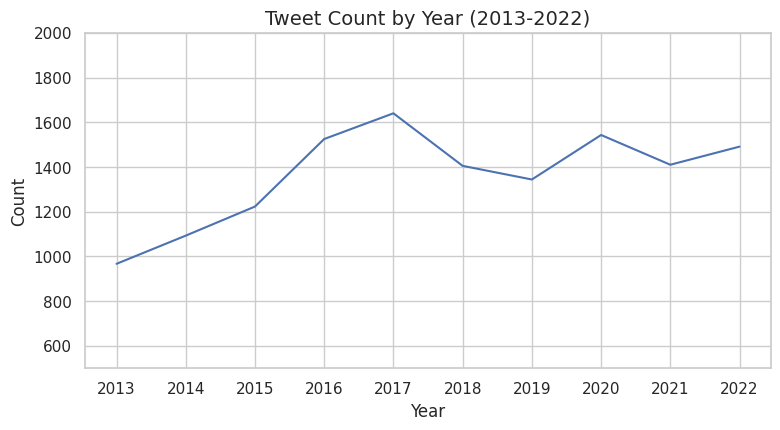

In [ ]:
plt.figure(figsize=(15, 8))

ax=plt.subplot(221)
sns.lineplot(tweets.Year.value_counts())
ax.set_xlabel('Year')
ax.set_ylabel('Count')
plt.title('Tweet Count by Year (2013-2022)', fontsize=14)
plt.ylim([500, 2000])
plt.xticks(np.arange(2013,2023,1))
#plt.grid()

plt.tight_layout()
plt.savefig(image_dir + 'Tweet_Count_Year_Line', dpi=600)

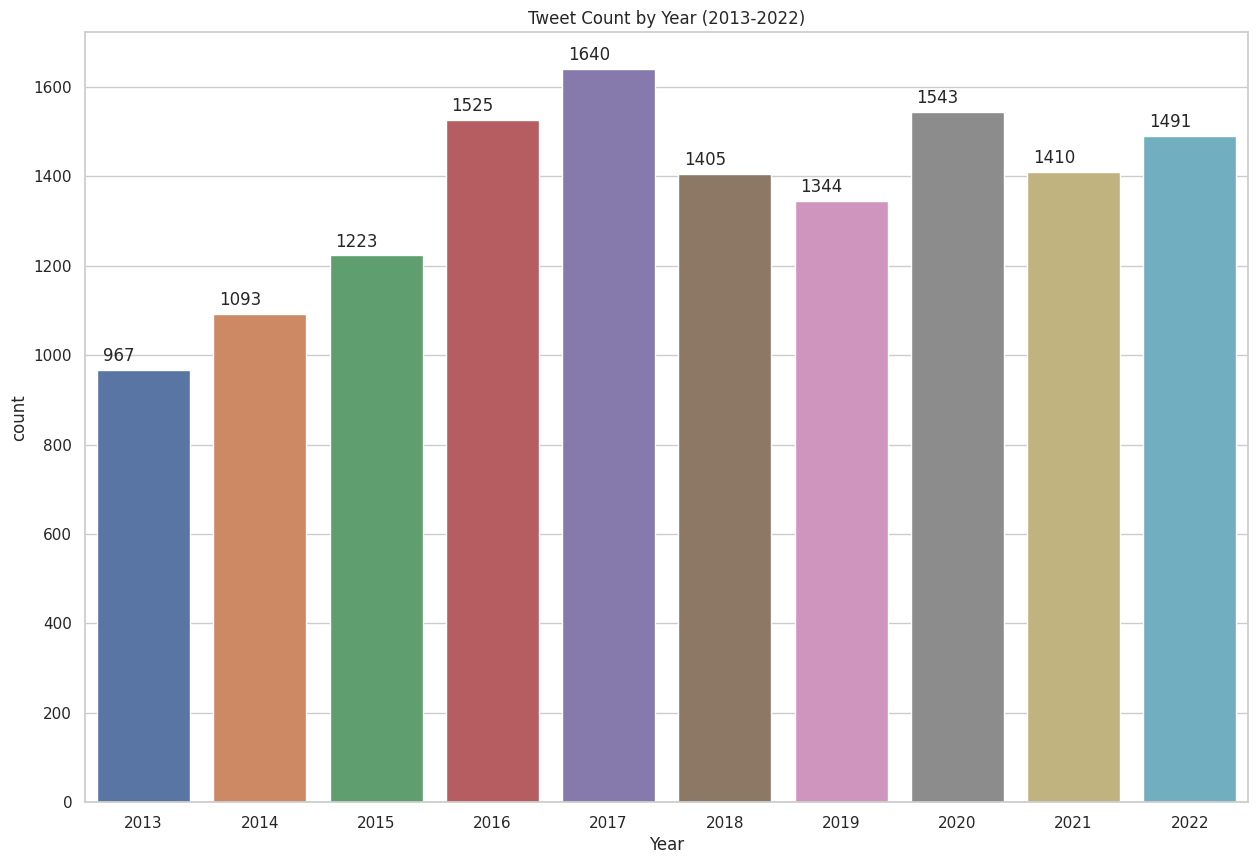

In [ ]:
f, ax = plt.subplots(figsize=(15, 10))
sns.countplot(x= tweets['Year'])
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.05, p.get_height()+20), fontsize = 12)

plt.title('Tweet Count by Year (2013-2022)')
plt.savefig(image_dir + 'Tweet_County_Year_Bar');

Here we can see that there is no distinct overall pattern. However, it does seem as though the number rise from June to August and dips in September. It does also look to generally decrease from January to February.

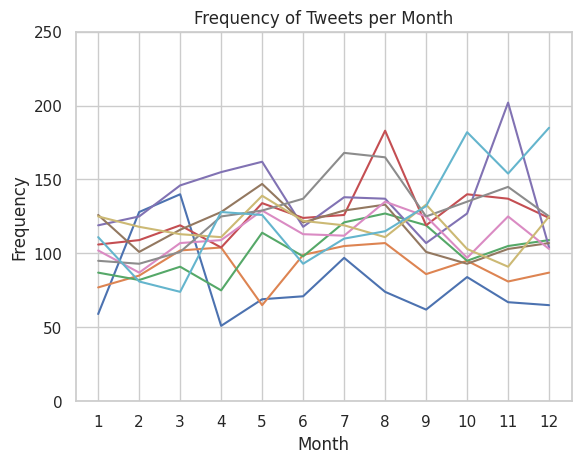

In [ ]:
#group the DataFrame on the values in the columns of 'Year' and 'Month'
#size() calculates the number of rows of each group
#then resets the index of the resulting series and gives the column name 'count'
grouped = tweets.groupby(['Year', 'Month']).size().reset_index(name='count')
#new 'grouped' DataFrame that has 'Year', 'Month', and 'count'

fig, ax = plt.subplots()
for year, group in grouped.groupby('Year'):
  group.plot(x='Month', y='count', ax=ax, label=year)
ax.set_xlabel('Month')
ax.set_ylabel('Frequency')
ax.set_title(f'Frequency of Tweets per Month')
plt.xticks(range(1,13))
plt.ylim([0, 250])
#plt.legend()
ax.legend().remove()

plt.savefig(image_dir + 'Tweet_Frequency_Month')

#Emotion Mining

The following section and code is based off of Patrick Ramos's paper: [Emotion Analysis of Writers and Readers of Japanese Tweets on Vaccinations](chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://aclanthology.org/2022.wassa-1.10.pdf) of which the code can be found [here](https://github.com/Ramos-Ramos/BERT-Japan-vaccination). Some of the descriptions or explanations will be taken directly from the GitHub page where it will be cited as (Ramos 2022).

Emotion mining is performed by fine-tuning a pre-trained BERT on a Japanese emotional analysis dataset and using the fine-tuned model and a dataset of tweets about vaccines to infer the emotions of Japanese SNS users towards vaccines (Ramos 2022).

The WRIME dataset will be used for fine-tuning BERT on emotion analysis.

WRIME (Dataset of Writers' and Readers' Intensities of Emotion for their Estimation) dataset: dataset for emotional intensity estimation comprised of 43,200 japanese tweets annotated with plutchik's 8 emotions by the posts' writers and 3 reader annotators hired by the dataset authors to read the posts (Ramos 2022).

Each post is annotated with following eight emotions (following Plutchik's framework) for both writers and readers:

* joy
* sadness
* anticipation
* surprise
* anger
* fear
* disgust
* trust

Each post can exhibit one or several of the emotions and the intesities are integers from 0 to 3, inclusive (respectively indicating "none", "weak", "medium", and "strong"). An example showing the annotation of a writer and the annotations of three readers, taken from the paper's Github, is shown below.

"タイヤがパンクしてた。。いたずらの可能性が高いんだって。。"

("The tire of my car was flat. I heard that it might be mischief.")

||Joy	|Sadness	|Anticipation	|Surprise	|Anger	|Fear	|Disgust	|Trust|
|---|---|---|---|---|---|---|---|---|
|Writer	 |0	|3	|0	|1	|3	|0	|0	|0|
|Reader 1|0	|3	|0	|3	|1	|2	|1	|0|
|Reader 2|0	|2	|0	|2	|0	|0	|0	|0|
|Reader 3|0	|2	|0	|2	|0	|1	|1	|0|

(Ramos 2022)

In [ ]:
!wget https://raw.githubusercontent.com/ids-cv/wrime/master/wrime-ver1.tsv

Huggingface is needed for the BERT model.

['transformers'](https://huggingface.co/docs/transformers/index) provides APIs and tools to download and train pretrained models.

['datasets'](https://huggingface.co/docs/datasets/index) is a library for accessing and sharing datasets for NLP tasks.

['ja'] specifies the Japanese language support.

In [ ]:
pip install -U transformers['ja'] datasets matplotlib

Necessary imports

In [ ]:
from datasets import load_dataset
from scipy.stats import pearsonr, ks_2samp
from sklearn import metrics
import torch
from transformers import BertJapaneseTokenizer, BertForSequenceClassification, Trainer, TrainingArguments, DataCollatorWithPadding, pipeline
from transformers.pipelines.base import KeyDataset
from tqdm.notebook import tqdm #progress bar
import matplotlib.patches as mpatches

from itertools import chain, product
from pathlib import Path

In [ ]:
#imported in the previous section but here for convenience
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
#same reason as above
from google.colab import drive
drive.mount('/content/drive')

Load tensorboard to view models after training.

In [ ]:
%load_ext tensorboard

Fill out the form below to choose where to save the datasets and model checkpoints

In [ ]:
save_root = '/content/'#@param {'type':'string'}
save_root = Path(save_root)

As mentioned, the WRIME dataset has three annotators. Their three scores are averaged to get only one set of reader emotions per data point. The dataset is also split into train, test, and validation sets using the splits provided by the dataset. (Ramos 2022)

In [ ]:
emotion_names = ('joy', 'sadness', 'anticipation', 'surprise', 'anger', 'fear', 'disgust', 'trust')
wrime_tsv_targets = [f'Writer_{emotion.title()}' for emotion in emotion_names] + \
                    [f'Reader{i}_{emotion.title()}' for i, emotion in product(range(1, 4), emotion_names)]

wrime_df = pd.read_csv('wrime-ver1.tsv', sep='\t')
wrime_df = wrime_df.rename(
    columns = dict([('Train/Dev/Test', 'split'), ('Sentence', 'text')]) + \
    [(col, col.replace('Saddness', 'Sadness')) for col in wrime_df.columns if 'Saddness' in col]
)
wrime_df = wrime_df[['split', 'text', *wrime_tsv_targets]]

for emotion in emotion_names:
  wrime_df[f'Reader_{emotion.title()}'] = wrime_df[[f'Reader{i}_{emotion.title()}' for i in range(1, 4)]].mean(axis = 1)

annotators = ('writer', 'reader')
wrime_df['label_ids'] = wrime_df[[f'{annotator.title()}_{emotion.title()}' for annotator, emotion in product(annotators, emotion_names)]].values.tolist()
wrime_df = wrime_df[['split', 'text', 'label_ids']]

for df_split, dataset_split in zip(['train', 'dev', 'test'], ['train', 'validation', 'test']):
  wrime_df[wrime_df.split==df_split].drop(columns='split').to_csv(save_root/f'wrime_{dataset_split}.csv', index=False)

Now load the dataset.

In [ ]:
wrime = load_dataset('csv', data_files={split:str(save_root/f'wrime_{split}.csv') for split in ['train', 'validation', 'test']})
wrime

The text has to be tokenized before using BERT. Ramos 2022 used a [tokenizer pre-trained on Japanese text by the Tohoku NLP Lab to tokenize](https://huggingface.co/cl-tohoku/bert-base-japanese-v2) WRIME.

In [ ]:
tokenizer = BertJapaneseTokenizer.from_pretrained('c1-tohoku/bert-base-japanese-v2')

def preprocess_function(examples):
  examples['label_ids'] = [eval(label_ids) for label_ids in examples['label_ids']]
  examples = tokenizer(examples['text'], truncation=True, max_length=512)
  return examples

tokenized_wrime = wrime.map(preprocess_function, batched=True)

In [ ]:
data_collator = DataCollatorWithPadding(tokenizer=tokenizer, max_length=512)

Now load the BERT model - this one is also from [Tohoku NLP lab](https://huggingface.co/cl-tohoku/bert-base-japanese-v2) and is trained on Japanese Wikipedia (Ramos 2022).


In [ ]:
model = BertForSequenceClassification.from_pretrained(
    'c1-tohoku/bert-base-japanese-v2'
    num_labels=16,
    problem_type='regression'
)

Report mean absolute error during training to measure performance - mean squared error will be used to fine-tune.

In [ ]:
def compute_metrics(eval_pred):
  """Computes metrics"""
  logits, labels = eval_pred
  return{
      'mae' : metrics.mean_absolute_error(y_true=labels, y_pred=logits)
  }

Begin training.

In [ ]:
training_args = TrainingArguments(
    output_dir=save_root / 'bert-base-japanese-v2-wrime-fine-tune',
    evaluation_strategy='epoch',
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    learning_rate=2e-5,
    weight_decay=0.01,
    adam_beta1=0.9,
    adam_beta2=0.999,
    num_train_epochs=3,
    lr_scheduler_type='linear',
    warmup_ratio=0.01,
    save_strategy='epoch',
    report_to='tensorboard'
)

trainer = Trainer(
    model=model,
    args=training_args,
    data_collater=data_collator,
    train_dataset=tokenized_wrime['train'].shuffle(seed=42),
    eval_dataset=tokenized_wrime['test'].shuffle(seed=42),
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

In [ ]:
trainer.train()

Tensorboard allows us to look at our metrics.

In [ ]:
%tensorboard --logdir "$save_root/bert-base-japanese-v2-wrime-fine-tune/"

In [ ]:
tweets = load_dataset('csv', data_files={'unsupervised':'tweets.csv'})['unsupervised']

In [ ]:
emotion_names = ('joy', 'sadness', 'anticipation', 'surprise', 'anger', 'fear', 'disgust', 'trust')
annotators = ('writer', 'reader')
labels = [f'{annotator}_{emotion}' for annotator, emotion in (product(annotators, emotion_names))]

The same tokenizer is loaded but the BERT model that was trained earlier will be used.

In [ ]:
model = BertForSequenceClassification.from_pretrained(
    save_root/'bert-base-japanese-v2-wrime-fine-tune/checkpoint-3750',
    num_labels=16,
    id2label={i:label for i, label in enumerate(labels)},
    max_length=512
)
tokenizer = BertJapaneseTokenizer.from_pretrained('c1-tohoku/bert-base-japanese-v2')

In [ ]:
pipe = pipeline(
    'text-classification',
    model=model,
    tokenizer=tokenizer,
    return_all_scores=True,
    function_to_apply='none',
    device=0 if torch.cuda.is_available() else -1
)

In [ ]:
emotion_scores = pd.DataFrame()

Iterate over the tweets scraped prior and infer the emotion scores from each tweet.

In [ ]:
for out in tqdm(pipe(KeyDataset(tweets, 'Tweet'), batch_size=64)):
  emotion_scores = emotion_scores.append(
      pd.DataFrame([dict([tuple(label_score.values()) for label_score in out])]),
      ignore_index=True
  )

Attach the emotion scores to the tweet dataset.

In [ ]:
killer_tweets_df = pd.read_csv('tweets.csv')
killer_tweets_emotions = pd.concat((killer_tweets_df, emotion_scores), axis='columns')
killer_tweets_emotions.to_csv(save_root/'killer_tweets_emotions.csv', index=False)

Show the average, standard deviation, and sum of each emotion column.

In [ ]:
killer_tweets_emotions = pd.read_csv(save_root/'killer_tweets_emotions.csv')

In [ ]:
emotion_summary = {'avg':[], 'st_dev':[], 'total':[]}
for emotion in labels:
  emotion_summary['avg'].append(killer_tweets_emotions[emotion].mean())
  emotion_summary['st_dev'].append(killer_tweets_emotions[emotion].std())
  emotion_summary['total'].append(killer_tweets_emotions[emotion].sum())
emotion_summary = pd.DataFrame(emotion_summary, index=labels)
emotion_summary

In [ ]:
emotion_summary.to_csv(save_root/'emotion_summary_1.csv', index=False)

###Visualize the Results

In [ ]:
emotions = ('joy', 'sadness', 'anticipation', 'surprise', 'anger', 'fear', 'disgust', 'trust')
annotators = ('writer', 'reader')
labels = [f'{ann}_{emo}' for ann, emo in product(annotators, emotions)]
writer_labels = [f'writer_{emo}' for emo in emotions]
reader_labels = [f'reader_{emo}' for emo in emotions]

Distribution of predicted emotion scores for writers and readers (boxplots).

In [ ]:
labels_no_collate = list(chain.from_iterable(zip(writer_labels, reader_labels)))
positions = np.arange(len(emotions))
width = 0.2

fig, ax = plt.subplots(figsize=(11, 6))

for sublabels in (writer_labels, reader_labels):
  boxplot = ax.boxplot(
      killer_tweets_emotions[sublabels[::-1]],
      showmeans=True,
      sym='',
      vert=False,
      widths=0.4,
      positions=(positions+width) if sublabels==writer_labels else (positions-width),
      patch_artist=True,
      boxprops={'color':'black', 'facecolor':'tab:red' if sublabels==writer_labels else 'tab:green'},
      whiskerprops={'color':'black'},
      capprops={'color':'black'},
      medianprops={'color':'black'},
      meanprops={'marker':'.', 'markerfacecolor':'black', 'markeredgecolor':'black'}
  )

writer_patch = mpatches.Patch(color='tab:red', label='Writer')
reader_patch = mpatches.Patch(color='tab:green', label = 'Reader')
ax.legend(handles=[writer_patch, reader_patch])

ax.set_ylabel('Emotion', fontsize=12)
ax.set_xlabel('Score', fontsize=12)
ax.set_yticks(positions, [emo.title() for emo in emotions[::-1]], fontsize=12)
ax.grid(axis='x')

plt.savefig(image_dir + 'boxplot_1', dpi=600)

plt.show()

Q-Q plot

In [ ]:
fig, axs = plt.subplots(2, 4, figsize=(8, 4))

for emotion, ax in zip(emotions, axs.flat):
  writer_subset = killer_tweets_emotions[f'writer_{emotion}']
  writer_quantiles = np.array([writer_subset.quantile(i/100) for i in range(100)])
  reader_subset = killer_tweets_emotions[f'reader_{emotion}']
  reader_quantiles = np.array([reader_subset.quantile(i/100) for i in range(100)])

  ax.plot(writer_quantiles, reader_quantiles, c='black')
  ax.set_xticks([0, 1, 2, 2.5], ['0', '1', '2', ''])
  ax.set_yticks([0, 1, 2, 2.5], ['0', '1', '2', ''])
  ax.grid()
  ax.set_title(emotion.title(), fontsize=14)

fig.supxlabel('Writer Quantiles', fontsize=14)
fig.supylabel('Reader Quantiles', fontsize=14)
fig.tight_layout()

plt.savefig(image_dir + 'QQ_1', dpi=600)

plt.show()